In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1P8mpSR8UgC3FKE5zD5n6JIdKkuNVHfra' -O dataset.zip

--2025-04-28 00:30:45--  https://docs.google.com/uc?export=download&id=1P8mpSR8UgC3FKE5zD5n6JIdKkuNVHfra
Resolving docs.google.com (docs.google.com)... 173.194.202.138, 173.194.202.101, 173.194.202.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1P8mpSR8UgC3FKE5zD5n6JIdKkuNVHfra&export=download [following]
--2025-04-28 00:30:45--  https://drive.usercontent.google.com/download?id=1P8mpSR8UgC3FKE5zD5n6JIdKkuNVHfra&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 342044 (334K) [application/octet-stream]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 334.03K  --.-KB/s   

In [3]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: images/George_W_Bush/
  inflating: images/George_W_Bush/1.jpg  
  inflating: images/George_W_Bush/10.jpg  
  inflating: images/George_W_Bush/2.jpg  
  inflating: images/George_W_Bush/3.jpg  
  inflating: images/George_W_Bush/4.jpg  
  inflating: images/George_W_Bush/5.jpg  
  inflating: images/George_W_Bush/6.jpg  
  inflating: images/George_W_Bush/7.jpg  
  inflating: images/George_W_Bush/8.jpg  
  inflating: images/George_W_Bush/9.jpg  
   creating: images/Laura_Bush/
  inflating: images/Laura_Bush/1.jpg  
  inflating: images/Laura_Bush/10.jpg  
  inflating: images/Laura_Bush/2.jpg  
  inflating: images/Laura_Bush/3.jpg  
  inflating: images/Laura_Bush/4.jpg  
  inflating: images/Laura_Bush/5.jpg  
  inflating: images/Laura_Bush/6.jpg  
  inflating: images/Laura_Bush/7.jpg  
  inflating: images/Laura_Bush/8.jpg  
  inflating: images/Laura_Bush/9.jpg  
   creating: images/Serena_Williams/
  inflating: images/Serena_Williams/1.jpg  
  inflating: image

In [4]:
def load_image(image_path):
  image = cv2.imread(image_path)
  if image is None:
    print('Error: Could not load image.')
    return None, None
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image, gray

In [5]:
load_image('/content/images/Vladimir_Putin/1.jpg')

(array([[[  2,   0,   4],
         [  4,   0,   5],
         [  1,   0,   4],
         ...,
         [ 62,  79, 106],
         [ 54,  68,  96],
         [ 54,  68,  96]],
 
        [[  2,   0,   4],
         [  3,   0,   4],
         [  1,   0,   4],
         ...,
         [ 63,  80, 107],
         [ 59,  73, 101],
         [ 58,  72, 100]],
 
        [[  2,   0,   4],
         [  3,   0,   4],
         [  1,   0,   4],
         ...,
         [ 68,  85, 112],
         [ 65,  79, 107],
         [ 65,  79, 107]],
 
        ...,
 
        [[  3,   1,   1],
         [  3,   1,   1],
         [  2,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  2,   0,   0],
         [  2,   0,   0],
         [  2,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  2,   0,   0],
         [  2,   0,   0],
         [  2,   0,   0],
         ...,
         [  0,   0,   0],
  

In [6]:
sample_image, sample_gray = load_image('/content/images/George_W_Bush/1.jpg')

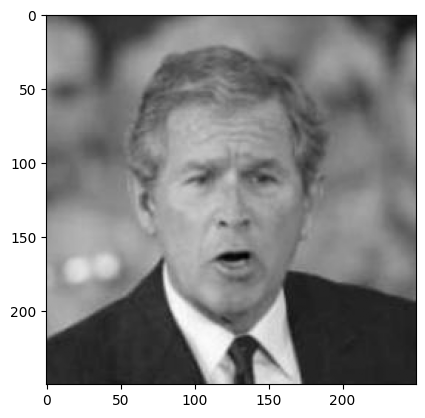

In [7]:
plt.imshow(sample_gray, cmap='gray')

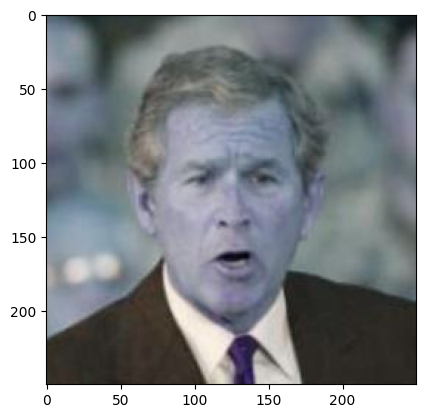

In [8]:
plt.imshow(sample_image)

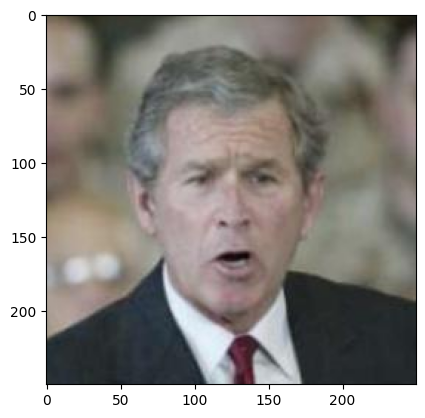

In [9]:
sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image_rgb)

In [12]:
from google.colab.patches import cv2
cv2.imshow(sample_image)

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
dataset_dir = '/content/images'
images = []
labels = []
for root, dirs, files in os.walk(dataset_dir):
  if len(files) == 0:
    continue
  for f in files:
    _, image = load_image(os.path.join(root, f))
    if image is None:
      continue
    images.append(image)
    labels.append(root.split('/')[-1])

In [ ]:
len(images)

40

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
def detect_faces(image_gray, scale_factor=1.1, min_neighbors=5,
min_size=(30, 30)):
  faces = face_cascade.detectMultiScale(
    image_gray,
    scaleFactor=scale_factor,
    minNeighbors=min_neighbors,
    minSize=min_size
  )
  return faces

In [ ]:
sample_faces = detect_faces(sample_image_rgb, min_size=(50, 50))

In [ ]:
def crop_faces(image_gray, faces, return_all=False):
  cropped_faces = []
  selected_faces = []
  if len(faces) > 0:
    if return_all:
      for x, y, w, h in faces:
        selected_faces.append((x, y, w, h))
        cropped_faces.append(image_gray[y:y+h, x:x+w])
    else:
      x, y, w, h = max(faces, key=lambda rect: rect[2] * rect[3])
      selected_faces.append((x, y, w, h))
      cropped_faces.append(image_gray[y:y+h, x:x+w])
  return cropped_faces, selected_faces

In [ ]:
cropped_faces, _ = crop_faces(sample_gray, sample_faces)

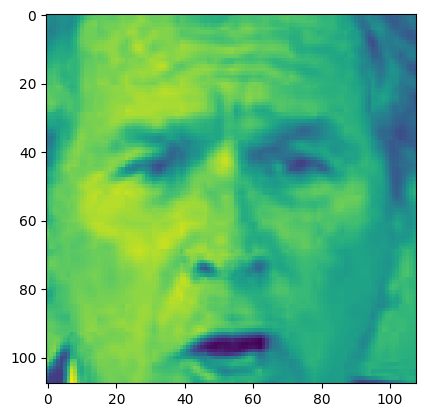

In [ ]:
plt.imshow(cropped_faces[0])

# Face Recognition

In [ ]:
face_size = (128, 128)

def resize_and_flatten(face):
  face_resized = cv2.resize(face, face_size)
  face_flattened = face_resized.flatten()
  return face_flattened

In [ ]:
X = []
y = []

for image, label in zip(images, labels):
  faces = detect_faces(image)
  cropped_faces, _ = crop_faces(image, faces)
  if len(cropped_faces) > 0:
    face_flattened = resize_and_flatten(cropped_faces[0])
    X.append(face_flattened)
    y.append(label)
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(40, 16384)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=177, stratify=y)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanCentering(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.mean_face = np.mean(X, axis=0)
    return self

  def transform(self, X):
    return X - self.mean_face

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
pipe = Pipeline([
  ('centering', MeanCentering()),
  ('pca', PCA(svd_solver='randomized', whiten=True, random_state=177)),
  ('svc', SVC(kernel='linear', random_state=177))
])

In [ ]:
from sklearn.metrics import classification_report

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

  George_W_Bush       0.40      0.67      0.50         3
     Laura_Bush       1.00      0.67      0.80         3
Serena_Williams       1.00      1.00      1.00         3
 Vladimir_Putin       0.50      0.33      0.40         3

       accuracy                           0.67        12
      macro avg       0.72      0.67      0.67        12
   weighted avg       0.72      0.67      0.68        12



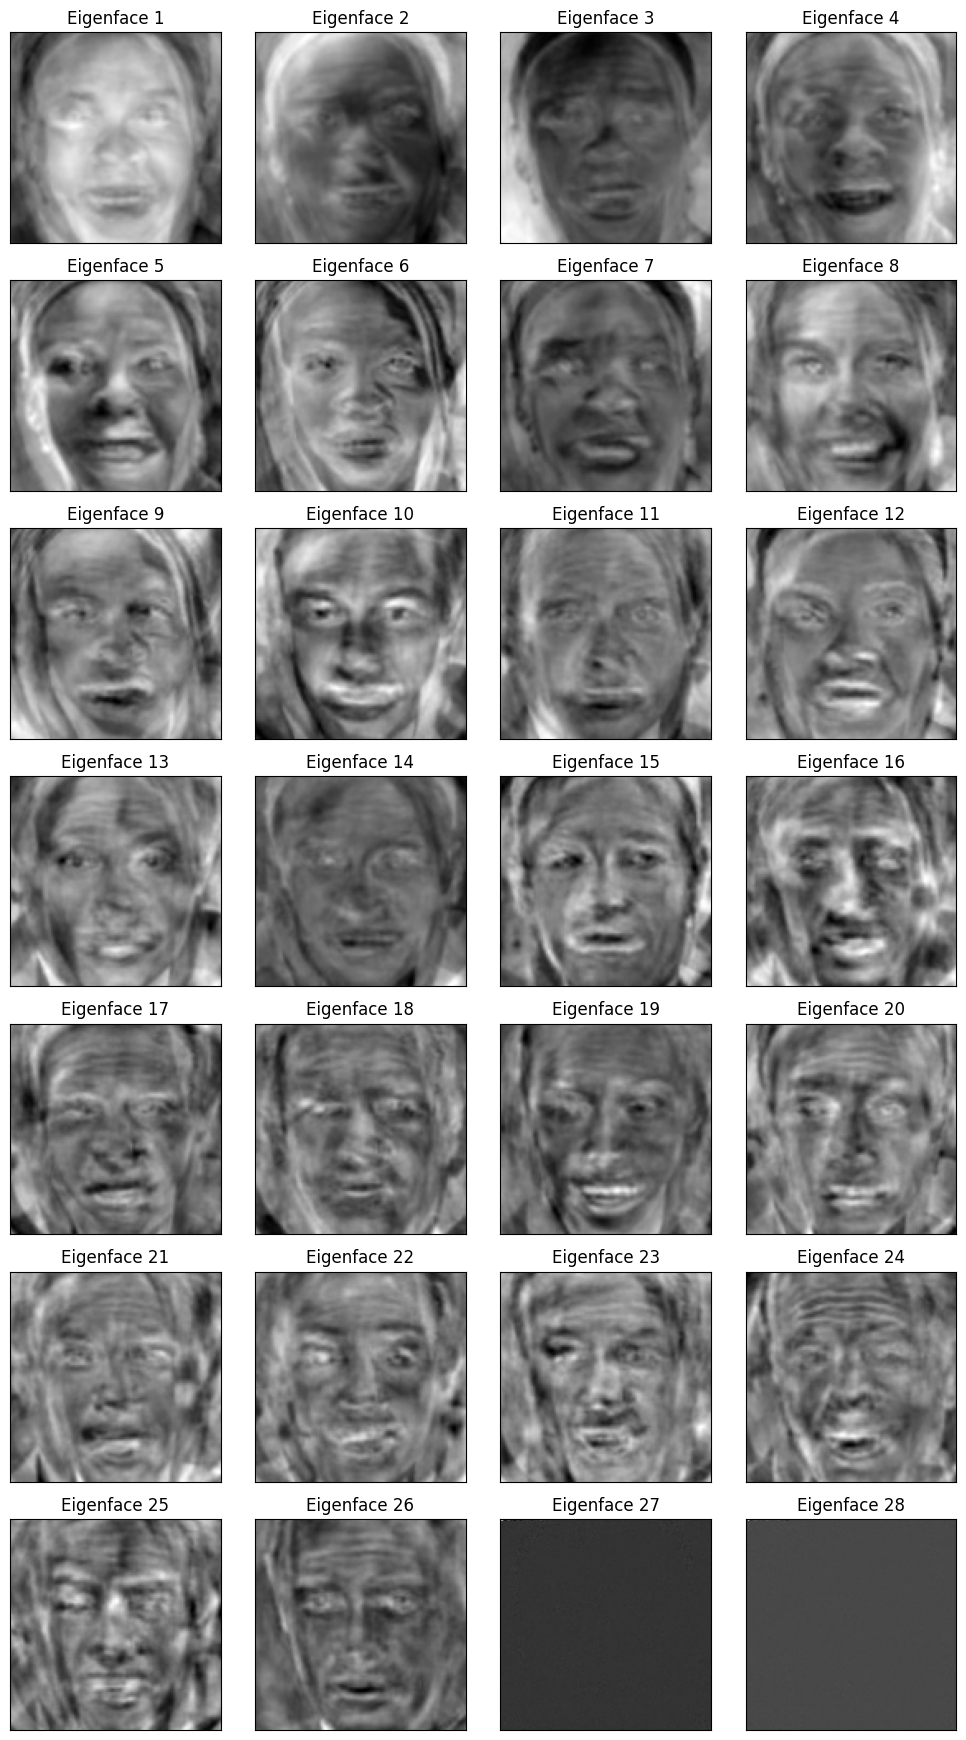

In [ ]:
n_components = len(pipe[1].components_)

ncol = 4
nrow = (n_components + ncol - 1) // ncol
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 2.5*nrow),
subplot_kw={'xticks':[], 'yticks':[]})
eigenfaces = pipe[1].components_.reshape((n_components,
X_train.shape[1]))

for i, ax in enumerate(axes.flat):
  ax.imshow(eigenfaces[i].reshape(face_size), cmap='gray')
  ax.set_title(f'Eigenface {i+1}')

plt.tight_layout()
plt.show()

In [ ]:
import pickle
with open('eigenface_pipeline.pkl', 'wb') as f:
  pickle.dump(pipe, f)

In [ ]:
def get_eigenface_score(X):
  X_pca = pipe[:2].transform(X)
  eigenface_scores = np.max(pipe[2].decision_function(X_pca), axis=1)
  return eigenface_scores

In [ ]:
def eigenface_prediction(image_gray):
  faces = detect_faces(image_gray)
  cropped_faces, selected_faces = crop_faces(image_gray, faces)

  if len(cropped_faces) == 0:
    return 'No face detected.'
  X_face = []
  for face in cropped_faces:
    face_flattened = resize_and_flatten(face)
    X_face.append(face_flattened)
  X_face = np.array(X_face)
  labels = pipe.predict(X_face)
  scores = get_eigenface_score(X_face)
  return scores, labels, selected_faces

In [ ]:
def draw_text(image, label, score,
font=cv2.FONT_HERSHEY_SIMPLEX,
pos=(0, 0),
font_scale=0.6,
font_thickness=2,
text_color=(0, 0, 0),
text_color_bg=(0, 255, 0)
):
  x, y = pos
  score_text = f'Score: {score:.2f}'
  (w1, h1), _ = cv2.getTextSize(score_text, font, font_scale, font_thickness)
  (w2, h2), _ = cv2.getTextSize(label, font, font_scale, font_thickness)
  cv2.rectangle(image, (x, y-h1-h2-25), (x + max(w1, w2)+20, y), text_color_bg, -1)
  cv2.putText(image, label, (x+10, y-10), font, font_scale, text_color, font_thickness)
  cv2.putText(image, score_text, (x+10, y-h2-15), font, font_scale, text_color, font_thickness)

In [ ]:
def draw_result(image, scores, labels, coords):
  result_image = image.copy()
  for (x, y, w, h), label, score in zip(coords, labels, scores):
    cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    draw_text(result_image, label, score, pos=(x, y))
  return result_image

In [ ]:
result_image = draw_result(sample_image, sample_scores, sample_labels, sample_faces)
plt.imshow(result_image)

NameError: name 'sample_scores' is not defined